# Preliminary analysis

## Are artific people also scientistic ? (find a catch phrase like "Make it pope-litical")

We are often put into boxes regarding our interests and hobbies, we have friends that have the same interests as us, we chose a department when we are young at high school and social media makes a lot of suggestions based on our past interests. We sometimes hear that artistic and scientific people are different, closed-minded in their subject and not interested in the other one. The main goal of this project is to study this stereotype by using the YouNiverse dataset using comments and video metadata files. We want to determine whether comment authors that have at least a particular amount of comments solely comment on one or both of the following categories: artistic/scientific, or both. We can examine whether it's true or not that the majority of profiles that comment on art videos never comment on scientific videos. To draw some conclusions about people’s interests, we can determine if the profiles that consider both types of videos mix them together over one time period or if they are more evenly distributed over several.

## Useful libraries

In [16]:
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
mpl.rcParams['figure.facecolor'] = 'white'
import os
import sys
import re

## Data importation

In [2]:
# datapath = 'C:\Users\Kelyan\OneDrive\Documents\GitHub\ada-2022-project-geksada'
# yt_meta_path = os.path.join(datapath, "yt_metadata_en.jsonl.gz")
# yt_meta_16_feater = os.path.join(datapath, "video_metadata2016.feather")

In [3]:
# yt_meta_16_feater = os.path.join(datapath, "video_metadata2016.feather")
df_meta_16 = pd.read_feather("video_metadata2016.feather")

In [4]:
print(len(df_meta_16))
df_meta_16.head()

4130410


,index,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,185,Education,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:36.933325,3.0,jCaqrZ8gSkY,116,11.0,"learn colors,kids colors,colors kids,count to ...",2016-05-03 00:00:00,2720.0
1,2658,Music,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:42:09.015401,28.0,WVapFh7cx3M,142,184.0,"En Av oss,one of us,project,Gutterommet,music,...",2016-06-06 00:00:00,4360.0
2,3862,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:41.215349,0.0,Qr8sptZ2vyA,266,25.0,"Atis Freivalds,Paradox,scary music,dark ambien...",2016-12-27 00:00:00,697.0
3,3863,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:41.849022,8.0,ZA5EW-DKS6M,473,188.0,"Psionic Asylum,Mental Jail,scary music,horror ...",2016-12-26 00:00:00,10387.0
4,3864,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:42.494555,2.0,bXlmyO-iW8g,192,35.0,"Clau||M,Dioxin,creepy msuic,epic horror music,...",2016-11-06 00:00:00,1702.0


## Data Selection

### Artistic videos

In [5]:
# Formatting the tags column in order to do exact word matching
#df_meta_16=df_meta_16[:15000] # for easiness of processing
df_meta_16['tags'] = df_meta_16['tags'].apply(str.lower)
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=(';',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=(',',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=('(',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=(')',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=('&',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.replace, args=('|',' ',))
df_meta_16['tags'] = df_meta_16['tags'].apply(str.split)

In [6]:
df_meta_16.head()

,index,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,185,Education,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:36.933325,3.0,jCaqrZ8gSkY,116,11.0,"[learn, colors, kids, colors, colors, kids, co...",2016-05-03 00:00:00,2720.0
1,2658,Music,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:42:09.015401,28.0,WVapFh7cx3M,142,184.0,"[en, av, oss, one, of, us, project, gutteromme...",2016-06-06 00:00:00,4360.0
2,3862,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:41.215349,0.0,Qr8sptZ2vyA,266,25.0,"[atis, freivalds, paradox, scary, music, dark,...",2016-12-27 00:00:00,697.0
3,3863,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:41.849022,8.0,ZA5EW-DKS6M,473,188.0,"[psionic, asylum, mental, jail, scary, music, ...",2016-12-26 00:00:00,10387.0
4,3864,Music,UCzWdpFOflXTOk5Gsi2aJ67g,2019-11-13 21:46:42.494555,2.0,bXlmyO-iW8g,192,35.0,"[clau, m, dioxin, creepy, msuic, epic, horror,...",2016-11-06 00:00:00,1702.0


In [87]:
# Words of Visual Arts
words_path_visual = "visual_arts.txt"
# words_path_literary = "literary_art.txt"
# words_path_performing = "performing_art.txt"
words_path_performing = "performing_art_light.txt"
words_path_literary = "literary_art_light.txt"

visual_arts = pd.read_csv(words_path_visual)
literary_arts = pd.read_csv(words_path_literary)
performing_arts = pd.read_csv(words_path_performing)

visual_words = visual_arts.values
literary_words = literary_arts.values
performing_words = performing_arts.values

visual_words = visual_words.flatten()
literary_words = literary_words.flatten()
performing_words = performing_words.flatten()

print(visual_words)
print(literary_words)
print(performing_words)

['ceramics' 'draw' 'draw in' 'drawing' 'drawings' 'paint' 'painter'
 'painting' 'paintings' 'sculpt' 'sculptor' 'sculpture' 'sculptures'
 'statue' 'statues' 'statuary' 'fresco' 'printmaking' 'linoleum'
 'linocut ' 'design' 'designs' 'designer' 'designers' 'craft' 'crafts'
 'photography' 'film-making' 'architect' 'architecture' 'architectures'
 'maquette' 'maquettes' 'pottery' 'potteries' 'earthenware' 'earthenwares'
 'terracotta' 'vase' 'vases' 'clayware' 'mosaic' 'mosaics' 'carve'
 'carving' 'motifs' 'sketching' 'sketchings' 'sketched' 'doodle' 'doodles'
 'doodling' 'dooodlings' 'acrylic' 'acrylic paint' 'oil paint'
 'spray paint' 'artwork' 'artworks' 'photojournalism' 'aperture'
 'exposure']
['literatures' 'writing' 'text' 'texts' 'poetry' 'prose' 'assonance'
 'alliteration' 'rhythm' 'poem' 'poems' 'novel' 'novels' 'romance'
 'novella' 'theatre' 'article' 'articles' 'biography' 'biographies'
 'essay' 'essays' 'pamphlet' 'abstract' 'book' 'books' 'letter' 'letters'
 'writings' 'litera

In [88]:
def check_tags_in_list(tags, word_list):
    word_present = 0
    
    # Make sets from the list of words
    x = set(tags)
    y = set(word_list)
    
    # Use intersection function of set type to quickly find which word are in both lists/sets
    z = x.intersection(y)
    
    # If the intersection is larger than 0, then there is at least a common word between both sets 
    if len(z) > 0:
        word_present = 1
    return word_present

In [89]:
df_meta_16['visual_art'] = df_meta_16['tags'].apply(lambda x : check_tags_in_list(x, visual_words))
df_meta_16['literary_art'] = df_meta_16['tags'].apply(lambda x : check_tags_in_list(x, literary_words))
df_meta_16['performing_art'] = df_meta_16['tags'].apply(lambda x : check_tags_in_list(x, performing_words))
df_meta_16["art"] = 0
df_meta_16["art"].loc[(df_meta_16.visual_art == 1) | (df_meta_16.literary_art == 1) | (df_meta_16.performing_art == 1)] = 1

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4108\1339503544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_16["art"].loc[(df_meta_16.visual_art == 1) | (df_meta_16.literary_art == 1) | (df_meta_16.performing_art == 1)] = 1


In [90]:
def return_word_in_list(tags, word_list):
    
    # Make sets from the list of words
    x = set(tags)
    y = set(word_list)
    
    # Use intersection function of set type to quickly find which word are in both lists/sets
    z = x.intersection(y)

    return z

In [91]:
df_meta_16['visual_art_word'] = df_meta_16['tags'].apply(lambda x : return_word_in_list(x, visual_words))
df_meta_16['literary_art_word'] = df_meta_16['tags'].apply(lambda x : return_word_in_list(x, literary_words))
df_meta_16['performing_art_word'] = df_meta_16['tags'].apply(lambda x : return_word_in_list(x, performing_words))

In [92]:
df_art = df_meta_16.loc[df_meta_16.art == 1]

### Scientific videos

In [93]:
df_science = df_meta_16.loc[df_meta_16.categories == "Science & Technology"]

## Exploratory Data Analysis

### Artistic videos

#### Artistic video distributions

In [94]:
perc = (df_art.shape[0]*100)/df_meta_16.shape[0]
print("The art category corresponds to", round(perc, 2), "% of the videos.")

The art category corresponds to 11.61 % of the videos.


Text(0, 0.5, '')

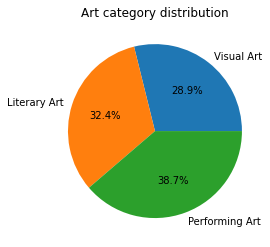

In [95]:
sum_arts = df_art[["visual_art", "literary_art", "performing_art"]].sum()
sum_arts.plot(kind="pie", labels = ["Visual Art", "Literary Art", "Performing Art"], autopct='%1.1f%%')
plt.title("Art category distribution")
plt.ylabel("")

In [96]:
df_art.columns

Index(['index', 'categories', 'channel_id', 'crawl_date', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'upload_date',
       'view_count', 'visual_art', 'literary_art', 'performing_art', 'art',
       'visual_art_word', 'literary_art_word', 'performing_art_word'],
      dtype='object')

Text(0.5, 1.0, 'Most common word(s) in tags which categorized the video as visual art')

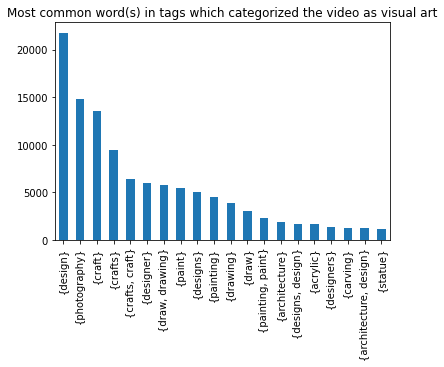

In [97]:
df_art.loc[df_art.visual_art == 1].visual_art_word.value_counts().head(20).plot(kind='bar')
plt.title("Most common word(s) in tags which categorized the video as visual art")

Text(0.5, 1.0, 'Most common word(s) in tags which categorized the video as literary art')

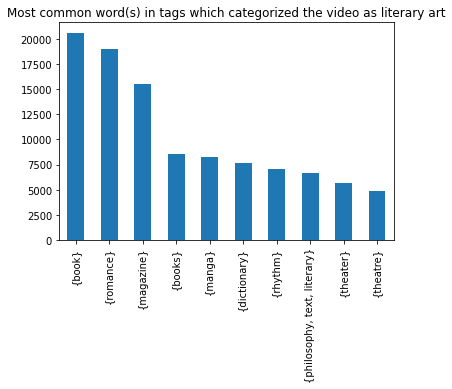

In [98]:
df_art.loc[df_art.literary_art == 1].literary_art_word.value_counts().head(10).plot(kind='bar')
plt.title("Most common word(s) in tags which categorized the video as literary art")

Text(0.5, 1.0, 'Most common word(s) in tags which categorized the video as performing art')

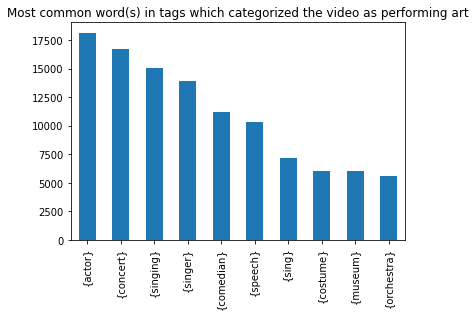

In [99]:
df_art.loc[df_art.performing_art == 1].performing_art_word.value_counts().head(10).plot(kind='bar')
plt.title("Most common word(s) in tags which categorized the video as performing art")

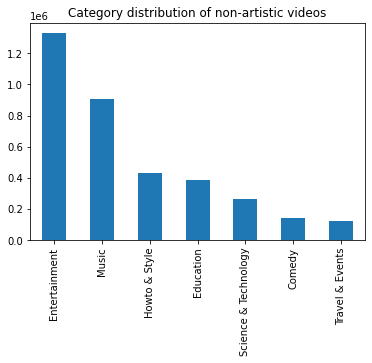

In [79]:
non_art_df = df_meta_16[(df_meta_16.visual_art==0) & (df_meta_16.literary_art==0) & (df_meta_16.performing_art==0)]

plt.figure()
non_art_df.categories.value_counts().plot(kind='bar')
plt.title("Category distribution of non-artistic videos")
plt.show()

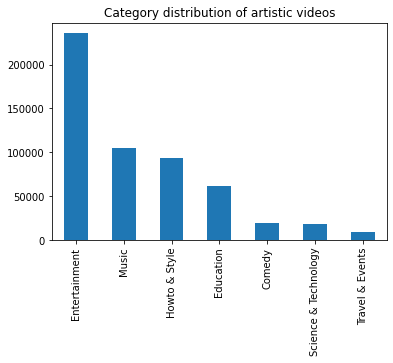

In [80]:
plt.figure()
df_art.categories.value_counts().plot(kind='bar')
plt.title("Category distribution of artistic videos")
plt.show()

Using Venn diagram, we can see the distribution of types of art in defined artistic category, as well as see videos with two or all three tags

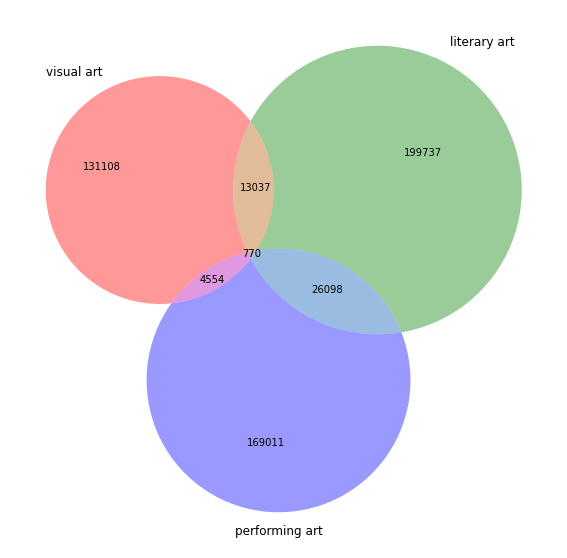

In [81]:
from matplotlib_venn import venn3

vis = df_art[(df_art['visual_art'] == 1)] 
lit = df_art[(df_art['literary_art'] == 1)]
perf = df_art[(df_art['performing_art'] == 1)]

plt.figure(figsize=(10,10))
set1 = set(vis['index'])
set2 = set(lit['index'])
set3 = set(perf['index'])

venn3([set1, set2, set3], ['visual art', 'literary art', 'performing art'])

plt.show()

#### Artistic videos over time

Check if there is a consistency of uploading artistic videos or if there are some patterns

In [28]:
# Convert upload date to only date format
df_meta_16['upload_date'] = pd.to_datetime(df_meta_16['upload_date'], format='%Y-%m-%d').dt.date
df_art['upload_date'] = pd.to_datetime(df_art['upload_date'], format='%Y-%m-%d').dt.date

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_4108\3384413439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art['upload_date'] = pd.to_datetime(df_art['upload_date'], format='%Y-%m-%d').dt.date


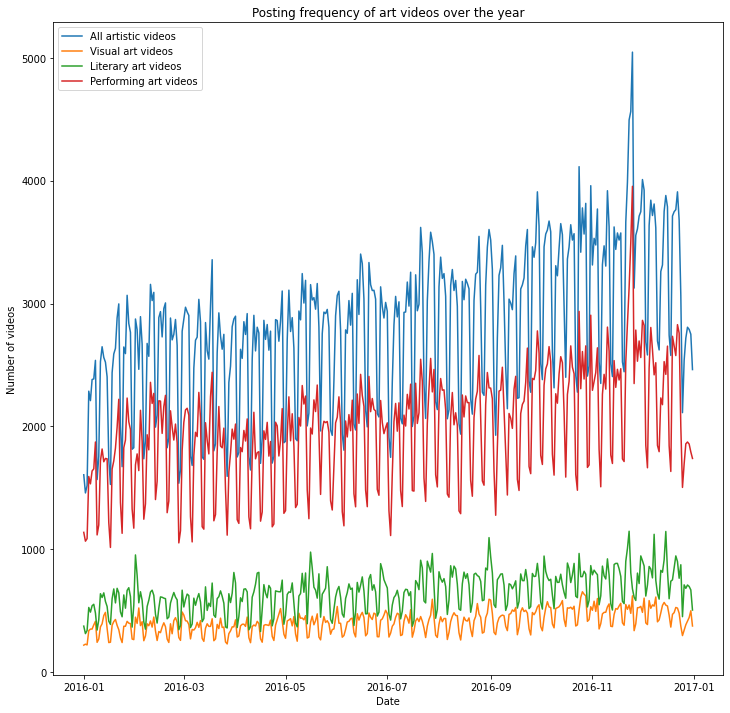

In [29]:
all_art_vid_count_year = df_art.groupby("upload_date").count().channel_id
vis_art_vid_count_year = df_art[df_art.visual_art==1].groupby("upload_date").count().channel_id
lit_art_vid_count_year = df_art[df_art.literary_art==1].groupby("upload_date").count().channel_id
perf_art_vid_count_year = df_art[df_art.performing_art==1].groupby("upload_date").count().channel_id

plt.figure(figsize=(12,12))
plt.plot(all_art_vid_count_year, label="All artistic videos")
plt.plot(vis_art_vid_count_year, label="Visual art videos")
plt.plot(lit_art_vid_count_year, label="Literary art videos")
plt.plot(perf_art_vid_count_year, label="Performing art videos")
plt.legend()
plt.title('Posting frequency of art videos over the year')
plt.xlabel('Date')
plt.ylabel('Number of videos')
plt.show()


In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap()
# plt.title("Posting of artistic videos over a year ")
# plt.xlabel('Months')
# plt.ylabel('Number of posted videos')
# plt.show()

TypeError: heatmap() missing 1 required positional argument: 'data'

<Figure size 1080x1080 with 0 Axes>